In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [ ]:
%autosave 0

# Referencias

Teoría de aprendizaje reforzado
- Sutton & Barto, ["Reinforcement Learning: An Introduction", MIT Press, 2nd ed, 2018](http://www.incompleteideas.net/book/the-book.html)
- David Silver (DeepMind), ["Reinforced Learning Course"](https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ)

Aprendizaje reforzado con redes neuronales
- Lex Friedman (MIT), ["Introduction to Deep Reinforced Learning"](https://www.youtube.com/watch?v=zR11FLZ-O9M&t=900s)
- Alexander Amini (MIT), ["Deep Reinforced Learning"]()


# Aprendizaje Supervisado 

Tenemos **ejemplos etiquetados** $(x, y)$ 

> Buscamos un mapeo $f_\theta : x \to y$

el cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min_w \sum_{i=1}^N y_i \log (\hat y_i) \quad \hat y_i = f_\theta (x_i)
$$
<br>

<div>
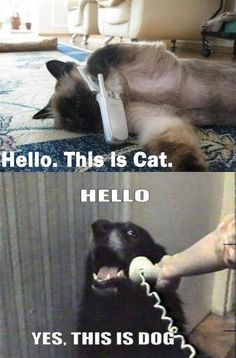
</div>

# Aprendizaje No Supervisado 

Tenemos **ejemplos sin etiqueta** $(x)$ 

> Buscamos una representación de los datos 

la cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min  \sum_{i=1}^N \sum_{k=1}^K w_{ik} \|x_i - \mu_k\|^2 \quad w_{ik} = \begin{cases} 1 & k = \text{arg}\min_j \| x_i - \mu_j\|^2 \\ 0 & \sim \end{cases} 
$$ 

<br>
<div>
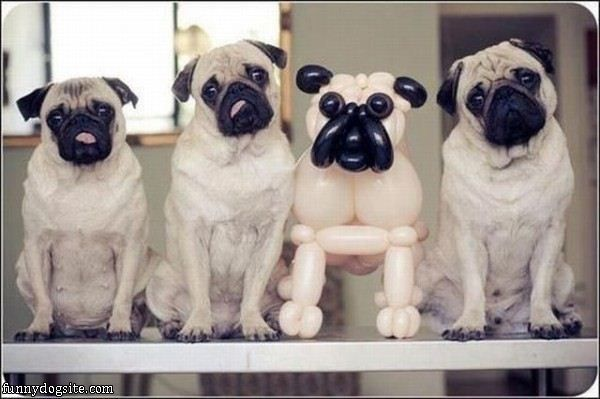
</div>

# Aprendizaje Reforzado (RL)

El problema fundamental de RL es 

> **aprender** a tomar la mejor **decisión** en un **ambiente** cambiante

¿Quién toma las decisiones?

> El sistema que toma las decisiones e interactua con el ambiente se llama **agente**

¿Cómo se cual es la mejor decisión?

> La mejor decisión es aquella que obtiene mayor **recompensa**

<br>
<div>
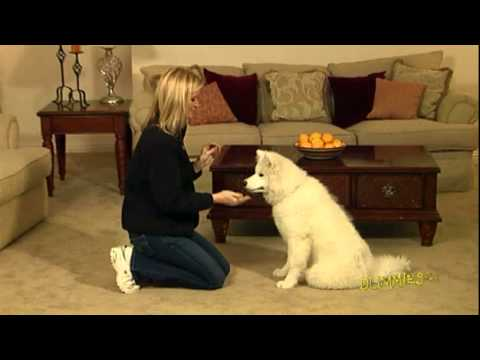
</div>

Esto supone diferencias importantes con los paradigmas de Machine Learning anteriores

Definamos estos componentes resaltando las diferencias

#### Ambiente y Estado

En lugar de ejemplos existe un **ambiente o mundo** el cual podemos observar

Nuestra perceción del ambiente no siempre es completa

El ambiente se representa por un vector denominado **estado**

#### Acciones

El agente no retorna predicciones sino que toma **decisiones**

En cada instante el agente escoge y realiza una **acción**

Existen **consecuencias**, las acciones realizadas pueden modificar el ambiente

#### Recompensa

La retroalimentación del agente no proviene de etiquetas sino de una **señal numérica escalar llamada recompensa**

La recompensa está asociada a uno o más estados

La recompensa puede ser positiva o negativa



#### Diferencias clave

- Supervisión: Al agente no se le dice que acción es buena, sino que estados son buenos

- Prueba y error: El agente debe descubrir que acción le entrega la mayor recompensa probándolas una a una

- Temporalidad: El entrenamiento y la ejecución son secuenciales, no se puede asumir iid

- Retraso en la retroalimentación: Las recompensas pueden demorar en llegar, las acciones pueden no traer recompensa inmediata pero si en el futuro



### Objetivo del agente

> Seleccionar acciones para maximizar la **recompensa acumulada futura**

En ciertos casos podría ser mejor abandonar una recompensa intermedia en pos de obtener una mayor recompensa final

### Hipótesis de recompensa

> Todo objetivo puede ser representado mediante la maximización de la recompensa acumulada esperada



### La vida de una gente

> Un agente de RL debe tener objetivos, debe poder sentir su ambiente y debe ser capaz de actuar sobre el mismo 


Tipicamente asumiremos que el tiempo es discreto $t=0, 1, 2, 3, ...$

En cada tiempo instante $t$ el agente
1. **recibe recompensa del ambiente:** $R_t$
1. **observa el ambiente:** $S_t$
1. **realiza una acción:** $A_t$


o en pseudo-código

    for t in 1, 2, 3, ...., N
        get Rt
        get St
        do At
        
o en diagrama (Sutton & Barto, Fig 3.1):

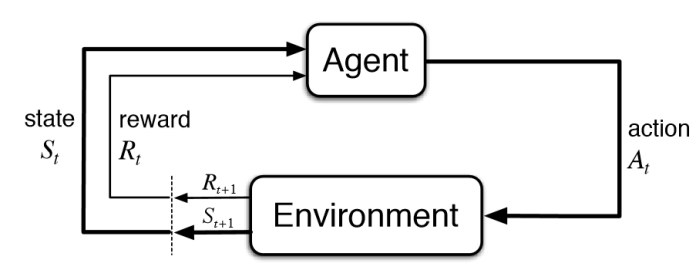

Luego la **historia** de un agente se puede definir como la siguiente trayectoria

$$
H_t = (S_0, A_0, R_1, S_1, A_1, \ldots, R_{t-1}, S_{t-1}, A_{t-1}, R_t, S_t, A_t)
$$

### Discusión

¿Puedes reconocer los agentes, las acciones, el ambiente, la recompensa y demás elementos de RL en los siguientes ejemplos?

¿Se podría resolver este problema usando aprendizaje supervisado? ¿Cuáles serían las limitaciones?

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("60pwnLB0DqY", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ev0wpVB7OEs", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("lpi19vExbzc", width=800, height=400)

Ref: Sección 1.2, Sutton & Barto

> Phil prepares his breakfast. Closely examined, even this apparently mundane
activity reveals a complex web of conditional behavior and interlocking goal–subgoal
relationships: walking to the cupboard, opening it, selecting a cereal box, then
reaching for, grasping, and retrieving the box. Other complex, tuned, interactive
sequences of behavior are required to obtain a bowl, spoon, and milk carton. Each
step involves a series of eye movements to obtain information and to guide reaching
and locomotion. Rapid judgments are continually made about how to carry the
objects or whether it is better to ferry some of them to the dining table before
obtaining others. Each step is guided by goals, such as grasping a spoon or getting
to the refrigerator, and is in service of other goals, such as having the spoon to eat
with once the cereal is prepared and ultimately obtaining nourishment. Whether
he is aware of it or not, Phil is accessing information about the state of his body
that determines his nutritional needs, level of hunger, and food preferences.


(Relacionado: https://youtu.be/E2evC2xTNWg)

### Discusión

Considere este [listado de ejemplos de aplicación de RL](https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12)


¿Qué tienen estos ejemplos en común?

> Interacción entre un agente que toma decisiones y su ambiente

> El agente trata de cumplir una meta a pesar de la incerteza del ambiente

> El agente usa la experiencia que adquiere para mejorar su comportamiento

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("qBZPSTR96N4", width=800, height=400)

[Robot PR1](https://ieeexplore.ieee.org/document/4543527) haciendo todo tipo de tareas domésticas

El video es un montaje ya que PR1 está siendo operado remotamente por un humano

> La habilidad motriz ya es suficiente, el desafio pendiente está en los algoritmos


# El agente en acción

Asumamos que nuestro agente tiene un número limitado de acciones posibles

$$
\mathcal{A} = \{a_1, a_2, a_3, \ldots, a_N\}
$$

En cada instante $t$ el agente escoge una acción en base al estado

La decisión se hace según una función denominada **política** (*policy*)

$$
\pi : \mathcal{S} \to \mathcal{A}
$$

La política es un mapa entre el espacio de estados y el espacio de acciones

#### Política determinista

La política está representada por una función

$$
a = \pi (s)
$$

Ej: Si tengo hambre y el timbre no está sonando apreto el timbre

#### Política estocástica

La política está representada por una distribución

$$
a \sim \pi(A|S) = P(A=a|S=s)
$$

Ej: Si tengo hambre y el timbre no está sonando 
- 9 de 10 veces apreto el timbre
- 1 de 10 veces aparece una mosca que me distrae y lo dejo en paz

En promedio apreto el timbre un 90% de las veces que me da hambre

# Procesos de decisión de Markov

El formalismo tras RL se basa en la teoría de **Sistemas Dinámicos** y **Control óptimo** 

En particular se sustenta en los **procesos de decisión de Markov** (*Markov Decision Process*) que a su vez se basa en la **cadena de Markov** (*Markov Chain*)

En una cadena de Markov tenemos 
- un conjunto de estados posibles $\mathcal{S}$ 
- un modelo de transición $T(s, s')$ 

El modelo representa la probablidad de pasar de un estado $s$ a otro $s'$

Además se cumple la **propiedad de Markov**

> El estado futuro es condicionalmente independiente del pasado dado presente

Que matematicamente, para un instante $t$ sería

$$
p(s_{t+1}| s_t, s_{t-1}, s_{t-2}, \ldots, s_2, s_1) = p(s_{t+1}| s_t)
$$

>El estado actual es un estadístico suficiente del futuro

#### Ejemplo

Queremos predecir el clima de Valdivia por medio de un modelo de cadena de Markov

Asumiremos que el clima de mañana es perfectamente predecible a partir del clima de hoy

Sean dos estados

- $s_A$ Luvioso
- $s_B$ Soleado

Con probabilidades condicionales $p(s_A|s_A) = 0.8$, $(s_B|s_A) = 0.2$, $P(s_A|s_B) = 0.5$ y $P(s_B|s_B) = 0.5$

La matriz de transición de la cadena es

$$
T = \begin{pmatrix} 0.8 & 0.5 \\ 0.2 & 0.5 \end{pmatrix}
$$

que también se puede visualizar como un mapa de transición

Si está lloviendo hoy, ¿Cuál es la probabidalidad de que llueva mañana, en tres dias más y en una semana más?

In [12]:
import numpy as np 

s = np.array([1, 0])
T = np.array([[0.8, 0.5],[0.2, 0.5]])

np.dot(np.linalg.matrix_power(T, 7), s)

array([0.7143482, 0.2856518])

¿Puedes explicar de dónde sale este resultado?

#### De Cadena de Markov a Proceso de Decisión de Markov (MDP)

El MDP es una reinterpretación de la cadena de Markov 

El MDP modela un agente que toma decisiones

En el MDP tenemos 
- un conjunto de estados posibles $\mathcal{S}$
- un conjunto de acciones posibles $\mathcal{A}$
- una función de recompensa $R(s)$
- una modelo de transición de tres variables $T(s, a, s')$ 

Ahora el modelo se interpreta como la probabilidad de llegar a $s'$ si estaba en $s$ y ejecuté $a$

Dado el estado y la acción actual, el proximo estado no depende del pasado: **Propiedad de Markov**

La existencia de $R(s)$ nos dice que algunos estados son más deseables que otros

#### Discusión: Aspiradora robot

Sea una robo-aspiradora encargada de limpiar nuestra habitación

<div>
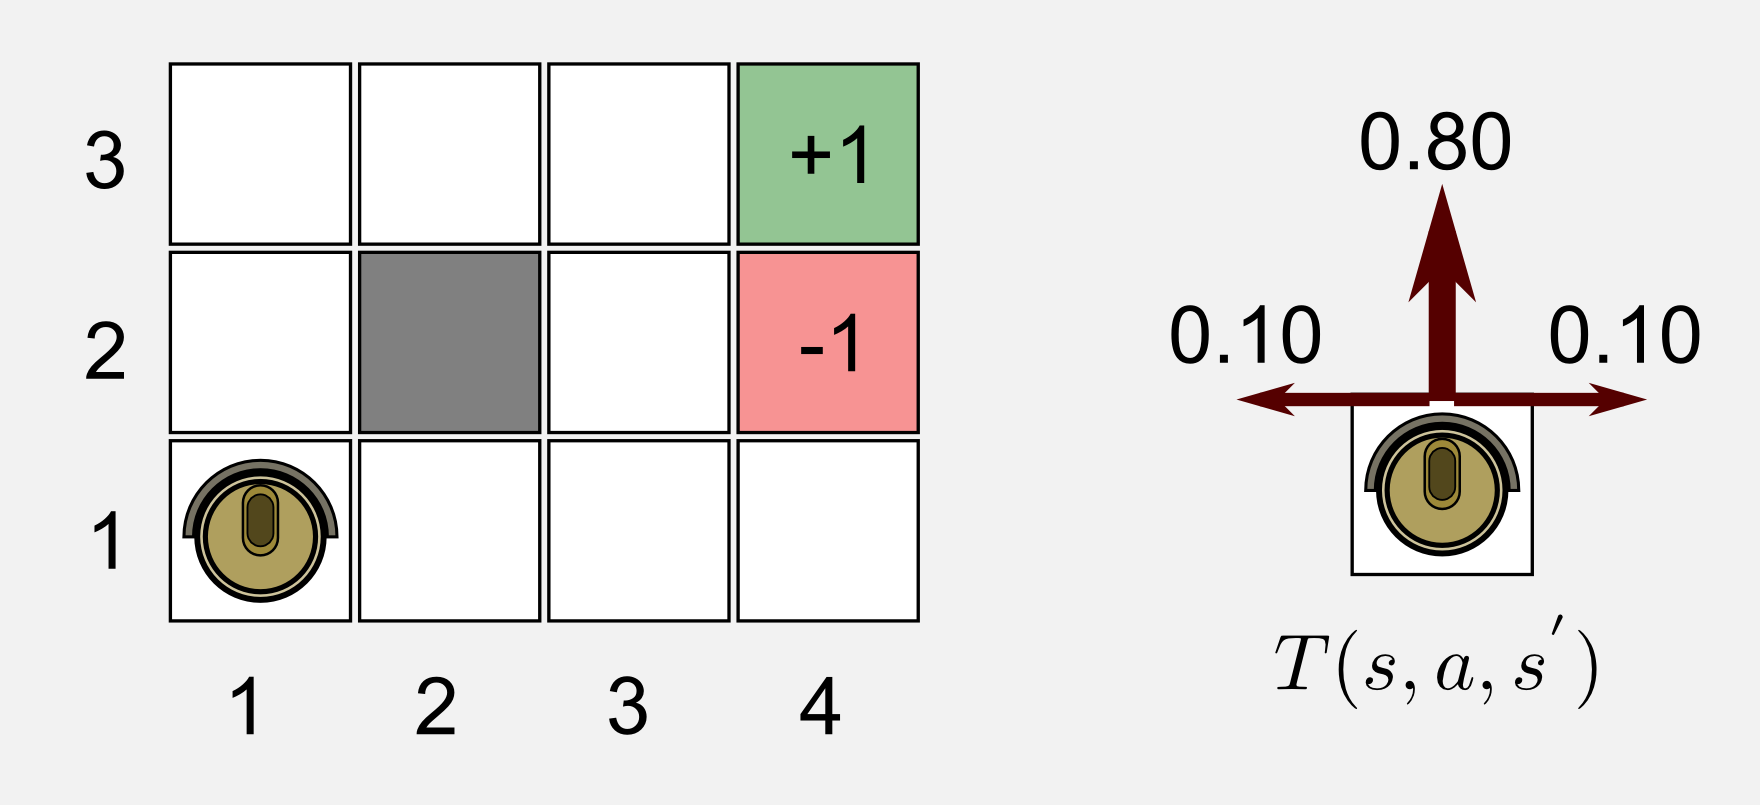
</div>

Nuestra habitación puede discretarse en $3\times 4 = 12$ bloques donde sólo 11 son accesibles por la aspiradora

- La aspiradora parte en el espacio $(1,1)$
- La estación de carga $(4,3)$ tiene una recompensa $+1$
- La escalera $(4, 2)$ tiene una recompensa $-1$
- Todos los demás cuadros tienen una recompensa $-0.04$
- La aspiradora rebota con las paredes y con el obstáculo
- El espacio tiene cuatro acciones, moverse al {N, S, E, O} 

Si el ambiente es determinista

¿Cúal es la mejor política?

Asumamos que ahora existe un elemento estocástico en el ambiente

Cuando la aspiradora quiere avanzar en una dirección
- En un 80% lo logra
- En un 10% se resbala y avanza en la dirección más próxima contrareloj
- En un 10% la ataca el gato y avanza en la dirección más próxima en el sentido del reloj

Ej: quiero ir al norte, en 80% lo logro, en un 10% me voy al oeste y un 10% al este

¿Cúal es la mejor política?

¿Cómo cambia la politica según el nivel de carga del robot?

# Política basada en valor

> ¿Cómo se construye una política óptima?

Asumamos que estamos en un instante $t$ en particular

Podemos definir la **recompensa total futura** como

$$
R_t + R_{t+1} + R_{t+2} + R_{t+3} +\ldots 
$$

y diseñar una política para maximizarla, pero

> Problema 1: la recompensa total futura podría diverger

> Problema 2: ambientes no estacionarios e incerteza sobre el futuro

Es más razonable usar una **recompensa total futura descontada**

$$
\begin{align}
G_t &= R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \ldots \nonumber \\
& = \sum_{k=0}^\infty \gamma^k R_{t+k} \nonumber
\end{align}
$$

donde $\gamma \approx 0.99$ es el factor de descuento, que controla la escala de tiempo del aprendizaje del agente

#### Discusión

Asumiendo un mundo ideal donde la inflación no existe y somos seres responsables, ¿Qué es mejor?
- Aceptar una donación de 10.000 pesos ahora
- Aceptar una donación de 10.000 en un año más



# Función Q

En base a $G_t$ podemos escribir la **recompensa total futura esperada** o **ganancia esperada**

$$
Q(s,a) = \mathbb{E}[G_t|S_t=s, A_t=a] 
$$

también llamada función **Q** 

> La función Q nos dice cuanta recompensa futura podemos obtener si estamos en el estado $s$ y ejecutamos la acción $a$

Luego una  política determinista basada en Q sería

$$
\pi^*(s) = \text{arg} \max_{a\in \mathcal{A}} Q(s, a)
$$

> Principio de máximas utilidades: Un agente racional escogerá la acción que maximize su ganancia esperada


Si conocemos la función de transición del agente podemos descomponer la función **Q** como sigue

$$
\begin{align}
Q(s,a) &= \mathbb{E}[G_t|S_t=s, A_t=a] \nonumber \\
&= R(s,a) + \gamma  \sum_{s' \in \mathcal{S}} T(s, a, s') \max_{a' \in \mathcal{A}} Q(s', a') \nonumber
\end{align}
$$

> que se conoce como **Ecuación de Bellman**

Si el ambiente es determinista y la acción $a$ en $s$ me lleva a $s'$ entonces esto se simplifica como

$$
Q(s,a) = R(s,a) + \gamma  \max_{a' \in \mathcal{A}} Q(s', a')
$$

> El valor Q en el estado actual es igual a la recompensa percibida actualmente más el valor descontado del mejor Q alcanzanble en el nuevo estado

En base a esto veremos como encontrar **Q** usando Q-Learning

# Q-Learning

Sea un agente con un conjunto finito de acciones y un ambiente con un conjunto finito de estados

La función Q se representa como una tabla 

| Q     | $a_1$ | $a_2$ | $a_3$ | $a_4$ |
|-------|-------|-------|-------|-------|
| $s_1$ | 0     | 0     | 0     | 0     |
| $s_2$ | 0     | 0     | 0     | 0     |
| $s_3$ | 0     | 0     | 0     | 0     |


Inicialmente la tabla Q está en cero y el objetivo es llenarla

La intuición es que si
- realizamos una acción en un estado determinado y nos da un resultado no deseado: evitar esa acción en ese estado
- realizamos una acción en un estado determinado y nos da un resultado deseado: preferir esa acción en ese estado
- todas las acciones en un cierto estado producen un resultado no deseado: evitar ese estado
- todas las acciones en un cierto estado producen un resultado deseado: buscar ese estado


> El agente se entrena por prueba y error hasta llenar la tabla  $Q(s,a)$

El algoritmo de Q-learning usa la siguiente regla de actualización al realizar la acción $a$ sobre un estado $s$ obteniendo una recompensa $r(s,a)$ y avanzando al estado $s'$  

$$
\begin{align}
Q(s, a) \leftarrow& (1-\alpha)Q(s,a) + \alpha \left(r(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a')\right)  = \nonumber \\
& Q(s,a) + \alpha \left(r(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a') - Q(s,a)\right)
\end{align}
$$

donde $\alpha \in [0, 1]$ es la tasa de aprendizaje

# Dilema de exploración y explotación

Un problema del algoritmo que acabamos de ver es que es demasiado explotador

> Siempre escoge la acción que maximiza **Q**: es una *greedy policy*

Sin embargo, especialmente al inicio, es crítico explorar el espacio de acciones. Se puede hacer la siguiente corrección

Se muestrea una variable Bernoulli (binaria) con probabilidad $1-\epsilon$ de ser $1$
- Si resulta 1, entonces se sigue la política óptima (greedy)
- Si resulta 0, entonces se escoge una acción al azar

Si inicia $\epsilon$ en un valor cercano a y se hace $\epsilon \to 0$ para $t \to \infty$

> Q-Learning $\epsilon$ greedy

## Ejemplo

# Próximamente

- Deep Q-leaning: Aprender Q usando redes neuronales
- Policy gradients: Aprender la política directamente usando redes neuronales
    - Veremos también como extender a espacios de acción continuos

https://github.com/openai/gym

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display

env = gym.make("Taxi-v3")
#env = gym.make("CartPole-v1")
#env = gym.make("SpaceInvaders-v0")
env.reset()
#plt.figure(figsize=(9,9), tight_layout=True)
#img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for _ in range(10):
    env.render()
    #img.set_data(env.render(mode='rgb_array')) # just update the data
    #display.display(plt.gcf())
    #display.clear_output(wait=True)    
    action = env.action_space.sample() # Random acction
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()

https://metacar-project.com/

https://www.youtube.com/watch?v=zR11FLZ-O9M&list=WL&index=14&t=0s

http://www.cs.us.es/~fsancho/?e=109

https://mpatacchiola.github.io/blog/2016/12/09/dissecting-reinforcement-learning.html

https://medium.com/@curiousily/solving-an-mdp-with-q-learning-from-scratch-deep-reinforcement-learning-for-hackers-part-1-45d1d360c120

https://github.com/aamini/introtodeeplearning/blob/master/lab3/RL.ipynb